In [237]:
import pandas as pd
import numpy as np

tdf=pd.read_csv("traveler_trip.csv")



In [238]:
tdf.columns

Index(['Trip ID', 'Country', 'City', 'Destination_id', 'Destination',
       'Trip_id', 'Start date', 'End date', 'Duration (days)', 'Traveler_id',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Trip_id.1', 'Accomm_id', 'Accommodation type',
       'Accommodation cost', 'Trip_id.2', 'Transp_id', 'Transportation type',
       'Transportation cost'],
      dtype='object')

In [239]:
#destination function
def clean_and_export_destination_data(file_path):
    # Load the data
    tdf = pd.read_csv(file_path)

    # Define the columns you're interested in
    destination_columns = ['Destination_id', 'Destination', 'City', 'Country']
    destination = tdf[destination_columns]

    # Split 'Destination' into 'City' and 'Country'
    destination_copy = destination.copy()
    destination_copy[['City', 'Country']] = destination_copy['Destination'].str.split(',', expand=True)
    destination = destination_copy

    # Clean country names
    country = destination['Country']
    country_clean = country.str.strip().replace({
        'AUS': 'Australia',
        'Aus': 'Australia',
        'Thai': 'Thailand',
        'UK': 'United Kingdom',
        'USA': 'United States',
        'SA': 'South Africa'
    })
    destination['Country'] = country_clean

    # Clean city names
    destination.loc[:, 'City'] = destination['City'].str.strip().replace({
        'New York City': 'New York'
    })

    # Fill missing countries based on city
    city_country_map = {
        'Cape Town': 'South Africa',
        'Santorini': 'Italy',
        'Phnom Penh': 'Cambodge',
        'Seoul': 'South Korea'
    }

    destination['Country'] = destination.apply(
        lambda row: city_country_map.get(row['City'], row['Country']),
        axis=1
    )

    
    # # Drop duplicates and ensure unique city-country pairs
    unique_destination = destination.drop_duplicates(subset=['City', 'Country']).reset_index(drop=True)


    #  # Filter out rows without a country and drop duplicates based on 'City' to ensure accuracy
    destination_clean = unique_destination[unique_destination['Country'].notna()].drop_duplicates(subset='City')

    # Reassign Destination_id sequentially
    destination_clean['Destination_id'] = range(1, len(destination_clean) + 1)
    
    
    # Drop the 'Destination' column as it's no longer needed
    destination_clean = destination_clean.drop(['Destination'], axis=1)

    return destination_clean.reset_index(drop=True)

In [240]:
destination=clean_and_export_destination_data("traveler_trip.csv")

In [241]:
destination

,Destination_id,City,Country
0,1,London,United Kingdom
1,2,Phuket,Thailand
2,3,Bali,Indonesia
3,4,New York,United States
4,5,Tokyo,Japan
5,6,Paris,France
6,7,Sydney,Australia
7,8,Rio de Janeiro,Brazil
8,9,Amsterdam,Netherlands
9,10,Dubai,United Arab Emirates


In [242]:
#Create City and Country columns in TDF

tdf[['City', 'Country']] = tdf['Destination'].str.split(',', expand=True)
tdf

,Trip ID,Country,City,Destination_id,Destination,Trip_id,Start date,End date,Duration (days),Traveler_id,...,Traveler gender,Traveler nationality,Trip_id.1,Accomm_id,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost
0,1,UK,London,NaN,"London, UK",NaN,5/1/2023,5/8/2023,7.0,NaN,...,Male,American,NaN,NaN,Hotel,1200,NaN,NaN,Flight,600
1,2,Thailand,Phuket,NaN,"Phuket, Thailand",NaN,6/15/2023,6/20/2023,5.0,NaN,...,Female,Canadian,NaN,NaN,Resort,800,NaN,NaN,Flight,500
2,3,Indonesia,Bali,NaN,"Bali, Indonesia",NaN,7/1/2023,7/8/2023,7.0,NaN,...,Male,Korean,NaN,NaN,Villa,1000,NaN,NaN,Flight,700
3,4,USA,New York,NaN,"New York, USA",NaN,8/15/2023,8/29/2023,14.0,NaN,...,Female,British,NaN,NaN,Hotel,2000,NaN,NaN,Flight,1000
4,5,Japan,Tokyo,NaN,"Tokyo, Japan",NaN,9/10/2023,9/17/2023,7.0,NaN,...,Female,Vietnamese,NaN,NaN,Airbnb,700,NaN,NaN,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Brazil,Rio de Janeiro,NaN,"Rio de Janeiro, Brazil",NaN,8/1/2023,8/10/2023,9.0,NaN,...,Male,Brazilian,NaN,NaN,Hostel,2500,NaN,NaN,Car,2000
135,136,Canada,Vancouver,NaN,"Vancouver, Canada",NaN,8/15/2023,8/21/2023,6.0,NaN,...,Female,Canadian,NaN,NaN,Hotel,5000,NaN,NaN,Airplane,3000
136,137,Thailand,Bangkok,NaN,"Bangkok, Thailand",NaN,9/1/2023,9/8/2023,7.0,NaN,...,Male,Chinese,NaN,NaN,Hostel,2000,NaN,NaN,Train,1000
137,138,Spain,Barcelona,NaN,"Barcelona, Spain",NaN,9/15/2023,9/22/2023,7.0,NaN,...,Female,Spanish,NaN,NaN,Airbnb,6000,NaN,NaN,Airplane,2500


In [243]:
tdf_final=tdf.merge(destination, on='Country', how='left')
tdf_final

,Trip ID,Country,City_x,Destination_id_x,Destination,Trip_id,Start date,End date,Duration (days),Traveler_id,...,Trip_id.1,Accomm_id,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost,Destination_id_y,City_y
0,1,UK,London,NaN,"London, UK",NaN,5/1/2023,5/8/2023,7.0,NaN,...,NaN,NaN,Hotel,1200,NaN,NaN,Flight,600,NaN,NaN
1,2,Thailand,Phuket,NaN,"Phuket, Thailand",NaN,6/15/2023,6/20/2023,5.0,NaN,...,NaN,NaN,Resort,800,NaN,NaN,Flight,500,NaN,NaN
2,3,Indonesia,Bali,NaN,"Bali, Indonesia",NaN,7/1/2023,7/8/2023,7.0,NaN,...,NaN,NaN,Villa,1000,NaN,NaN,Flight,700,NaN,NaN
3,4,USA,New York,NaN,"New York, USA",NaN,8/15/2023,8/29/2023,14.0,NaN,...,NaN,NaN,Hotel,2000,NaN,NaN,Flight,1000,NaN,NaN
4,5,Japan,Tokyo,NaN,"Tokyo, Japan",NaN,9/10/2023,9/17/2023,7.0,NaN,...,NaN,NaN,Airbnb,700,NaN,NaN,Train,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Brazil,Rio de Janeiro,NaN,"Rio de Janeiro, Brazil",NaN,8/1/2023,8/10/2023,9.0,NaN,...,NaN,NaN,Hostel,2500,NaN,NaN,Car,2000,NaN,NaN
135,136,Canada,Vancouver,NaN,"Vancouver, Canada",NaN,8/15/2023,8/21/2023,6.0,NaN,...,NaN,NaN,Hotel,5000,NaN,NaN,Airplane,3000,NaN,NaN
136,137,Thailand,Bangkok,NaN,"Bangkok, Thailand",NaN,9/1/2023,9/8/2023,7.0,NaN,...,NaN,NaN,Hostel,2000,NaN,NaN,Train,1000,NaN,NaN
137,138,Spain,Barcelona,NaN,"Barcelona, Spain",NaN,9/15/2023,9/22/2023,7.0,NaN,...,NaN,NaN,Airbnb,6000,NaN,NaN,Airplane,2500,NaN,NaN


In [244]:
tdf_final=tdf.drop('Destination', axis=1)
#tdf_final= tdf_final.rename(columns={'Destination': 'Destination_id'})
tdf_final

,Trip ID,Country,City,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id,Traveler name,...,Traveler gender,Traveler nationality,Trip_id.1,Accomm_id,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost
0,1,UK,London,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,...,Male,American,NaN,NaN,Hotel,1200,NaN,NaN,Flight,600
1,2,Thailand,Phuket,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,...,Female,Canadian,NaN,NaN,Resort,800,NaN,NaN,Flight,500
2,3,Indonesia,Bali,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,...,Male,Korean,NaN,NaN,Villa,1000,NaN,NaN,Flight,700
3,4,USA,New York,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,...,Female,British,NaN,NaN,Hotel,2000,NaN,NaN,Flight,1000
4,5,Japan,Tokyo,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,...,Female,Vietnamese,NaN,NaN,Airbnb,700,NaN,NaN,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Brazil,Rio de Janeiro,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,...,Male,Brazilian,NaN,NaN,Hostel,2500,NaN,NaN,Car,2000
135,136,Canada,Vancouver,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,...,Female,Canadian,NaN,NaN,Hotel,5000,NaN,NaN,Airplane,3000
136,137,Thailand,Bangkok,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,...,Male,Chinese,NaN,NaN,Hostel,2000,NaN,NaN,Train,1000
137,138,Spain,Barcelona,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,...,Female,Spanish,NaN,NaN,Airbnb,6000,NaN,NaN,Airplane,2500


In [245]:
tdf_final.insert(1,'Destination_id', tdf_final.pop('Destination_id'))
tdf_final

,Trip ID,Destination_id,Country,City,Trip_id,Start date,End date,Duration (days),Traveler_id,Traveler name,...,Traveler gender,Traveler nationality,Trip_id.1,Accomm_id,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost
0,1,NaN,UK,London,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,...,Male,American,NaN,NaN,Hotel,1200,NaN,NaN,Flight,600
1,2,NaN,Thailand,Phuket,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,...,Female,Canadian,NaN,NaN,Resort,800,NaN,NaN,Flight,500
2,3,NaN,Indonesia,Bali,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,...,Male,Korean,NaN,NaN,Villa,1000,NaN,NaN,Flight,700
3,4,NaN,USA,New York,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,...,Female,British,NaN,NaN,Hotel,2000,NaN,NaN,Flight,1000
4,5,NaN,Japan,Tokyo,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,...,Female,Vietnamese,NaN,NaN,Airbnb,700,NaN,NaN,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,Brazil,Rio de Janeiro,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,...,Male,Brazilian,NaN,NaN,Hostel,2500,NaN,NaN,Car,2000
135,136,NaN,Canada,Vancouver,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,...,Female,Canadian,NaN,NaN,Hotel,5000,NaN,NaN,Airplane,3000
136,137,NaN,Thailand,Bangkok,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,...,Male,Chinese,NaN,NaN,Hostel,2000,NaN,NaN,Train,1000
137,138,NaN,Spain,Barcelona,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,...,Female,Spanish,NaN,NaN,Airbnb,6000,NaN,NaN,Airplane,2500


In [246]:
tdf_final=tdf_final.drop('City',axis=1)
tdf_final=tdf_final.drop('Country',axis=1)
tdf_final

,Trip ID,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id,Traveler name,Traveler age,Traveler gender,Traveler nationality,Trip_id.1,Accomm_id,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost
0,1,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,35.0,Male,American,NaN,NaN,Hotel,1200,NaN,NaN,Flight,600
1,2,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,28.0,Female,Canadian,NaN,NaN,Resort,800,NaN,NaN,Flight,500
2,3,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,45.0,Male,Korean,NaN,NaN,Villa,1000,NaN,NaN,Flight,700
3,4,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,29.0,Female,British,NaN,NaN,Hotel,2000,NaN,NaN,Flight,1000
4,5,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,26.0,Female,Vietnamese,NaN,NaN,Airbnb,700,NaN,NaN,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,37.0,Male,Brazilian,NaN,NaN,Hostel,2500,NaN,NaN,Car,2000
135,136,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,29.0,Female,Canadian,NaN,NaN,Hotel,5000,NaN,NaN,Airplane,3000
136,137,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,34.0,Male,Chinese,NaN,NaN,Hostel,2000,NaN,NaN,Train,1000
137,138,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,25.0,Female,Spanish,NaN,NaN,Airbnb,6000,NaN,NaN,Airplane,2500


In [247]:
file_path = r"traveler_trip.csv"
tdf2 = pd.read_csv(file_path, encoding="latin1")

columns_to_keep = [
    "Traveler_id",          
    "Traveler name",
    "Traveler age",
    "Traveler gender",
    "Traveler nationality"
]
tdf2_traveler = tdf2[columns_to_keep].copy()

# Clean whitespace and drop incomplete rows
tdf2_traveler = tdf2_traveler.replace(r'^\s*$', pd.NA, regex=True)
tdf2_traveler = tdf2_traveler.dropna(
    subset=["Traveler name", "Traveler age", "Traveler gender", "Traveler nationality"],
    how="any"
)

# Normalize traveler names for consistent ID assignment
name_key = (
    tdf2_traveler["Traveler name"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.lower()
)

# Create unique Traveler_id values based on normalized names
codes, uniques = pd.factorize(name_key, sort=False)
tdf2_traveler["Traveler_id"] = codes + 1

# Drop any duplicate traveler IDs (keep first occurrence)
tdf2_traveler = tdf2_traveler.drop_duplicates(subset=["Traveler_id"], keep="first")

# Reorder columns
tdf2_traveler = tdf2_traveler[[
    "Traveler_id",
    "Traveler name",
    "Traveler age",
    "Traveler gender",
    "Traveler nationality"
]]

tdf2_traveler.head()

,Traveler_id,Traveler name,Traveler age,Traveler gender,Traveler nationality
0,1,John Smith,35.0,Male,American
1,2,Jane Doe,28.0,Female,Canadian
2,3,David Lee,45.0,Male,Korean
3,4,Sarah Johnson,29.0,Female,British
4,5,Kim Nguyen,26.0,Female,Vietnamese


In [248]:
tdf2_traveler.nunique()
tdf2_traveler['Traveler name'].value_counts() 

Traveler name
John Smith         1
Jane Doe           1
David Lee          1
Sarah Johnson      1
Kim Nguyen         1
                  ..
Jose Perez         1
Emma Wilson        1
Ryan Chen          1
Sofia Rodriguez    1
William Brown      1
Name: count, Length: 109, dtype: int64

In [249]:
tdf3=tdf_final.merge(tdf2_traveler, on='Traveler name', how='left')

In [250]:
tdf3

,Trip ID,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id_x,Traveler name,Traveler age_x,Traveler gender_x,...,Accommodation type,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost,Traveler_id_y,Traveler age_y,Traveler gender_y,Traveler nationality_y
0,1,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,35.0,Male,...,Hotel,1200,NaN,NaN,Flight,600,1.0,35.0,Male,American
1,2,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,28.0,Female,...,Resort,800,NaN,NaN,Flight,500,2.0,28.0,Female,Canadian
2,3,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,45.0,Male,...,Villa,1000,NaN,NaN,Flight,700,3.0,45.0,Male,Korean
3,4,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,29.0,Female,...,Hotel,2000,NaN,NaN,Flight,1000,4.0,29.0,Female,British
4,5,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,26.0,Female,...,Airbnb,700,NaN,NaN,Train,200,5.0,26.0,Female,Vietnamese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,37.0,Male,...,Hostel,2500,NaN,NaN,Car,2000,105.0,37.0,Male,Brazilian
135,136,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,29.0,Female,...,Hotel,5000,NaN,NaN,Airplane,3000,106.0,29.0,Female,Canadian
136,137,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,34.0,Male,...,Hostel,2000,NaN,NaN,Train,1000,107.0,34.0,Male,Chinese
137,138,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,25.0,Female,...,Airbnb,6000,NaN,NaN,Airplane,2500,108.0,25.0,Female,Spanish


In [251]:
#tdf3 = tdf3.drop(['Destination_id_x','Traveler_id_x','Traveler gender_x','Traveler nationality_x','Traveler age_x'], axis=1)

In [252]:
#tdf3

In [253]:
accommodation=pd.read_csv("accom_types_cleaned.csv")
accommodation


,Accommodation type_id,Accommodation type_name
0,1,Hotel
1,2,Resort
2,3,Villa
3,4,Airbnb
4,5,Hostel
5,6,Riad
6,7,Vacation rental
7,9,Guesthouse


In [254]:
accommodation

,Accommodation type_id,Accommodation type_name
0,1,Hotel
1,2,Resort
2,3,Villa
3,4,Airbnb
4,5,Hostel
5,6,Riad
6,7,Vacation rental
7,9,Guesthouse


In [255]:
accommodation=accommodation.rename(columns={'Accommodation type_name': 'Accommodation type'})

In [256]:
tdf4=tdf3.merge(accommodation, on='Accommodation type', how='left')

In [257]:
tdf4

,Trip ID,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id_x,Traveler name,Traveler age_x,Traveler gender_x,...,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost,Traveler_id_y,Traveler age_y,Traveler gender_y,Traveler nationality_y,Accommodation type_id
0,1,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,35.0,Male,...,1200,NaN,NaN,Flight,600,1.0,35.0,Male,American,1.0
1,2,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,28.0,Female,...,800,NaN,NaN,Flight,500,2.0,28.0,Female,Canadian,2.0
2,3,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,45.0,Male,...,1000,NaN,NaN,Flight,700,3.0,45.0,Male,Korean,3.0
3,4,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,29.0,Female,...,2000,NaN,NaN,Flight,1000,4.0,29.0,Female,British,1.0
4,5,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,26.0,Female,...,700,NaN,NaN,Train,200,5.0,26.0,Female,Vietnamese,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,37.0,Male,...,2500,NaN,NaN,Car,2000,105.0,37.0,Male,Brazilian,5.0
135,136,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,29.0,Female,...,5000,NaN,NaN,Airplane,3000,106.0,29.0,Female,Canadian,1.0
136,137,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,34.0,Male,...,2000,NaN,NaN,Train,1000,107.0,34.0,Male,Chinese,5.0
137,138,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,25.0,Female,...,6000,NaN,NaN,Airplane,2500,108.0,25.0,Female,Spanish,4.0


In [258]:
tdf4=tdf4.rename(columns={'Traveler_id_y':'Travel_id', 'Traveler gender_y': 'Traveler gender', 'Traveler nationality_y': 'Traveler nationality', 'Traveler age_y': 'Traveler age'})

In [259]:
tdf=tdf.rename(columns={'Travel_id': 'Traveler_id'})
tdf4

,Trip ID,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id_x,Traveler name,Traveler age_x,Traveler gender_x,...,Accommodation cost,Trip_id.2,Transp_id,Transportation type,Transportation cost,Travel_id,Traveler age,Traveler gender,Traveler nationality,Accommodation type_id
0,1,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,35.0,Male,...,1200,NaN,NaN,Flight,600,1.0,35.0,Male,American,1.0
1,2,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,28.0,Female,...,800,NaN,NaN,Flight,500,2.0,28.0,Female,Canadian,2.0
2,3,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,45.0,Male,...,1000,NaN,NaN,Flight,700,3.0,45.0,Male,Korean,3.0
3,4,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,29.0,Female,...,2000,NaN,NaN,Flight,1000,4.0,29.0,Female,British,1.0
4,5,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,26.0,Female,...,700,NaN,NaN,Train,200,5.0,26.0,Female,Vietnamese,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,37.0,Male,...,2500,NaN,NaN,Car,2000,105.0,37.0,Male,Brazilian,5.0
135,136,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,29.0,Female,...,5000,NaN,NaN,Airplane,3000,106.0,29.0,Female,Canadian,1.0
136,137,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,34.0,Male,...,2000,NaN,NaN,Train,1000,107.0,34.0,Male,Chinese,5.0
137,138,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,25.0,Female,...,6000,NaN,NaN,Airplane,2500,108.0,25.0,Female,Spanish,4.0


In [260]:
transportation=pd.read_csv("trans_types_cleaned.csv")
transportation

,Transportation type_id,Transportation type_name
0,1,Flight
1,2,Train
2,3,Plane
3,4,Bus
4,5,Car rental
5,6,Subway
6,8,Car
7,9,Ferry
8,10,Airplane


In [261]:
transportation=transportation.rename(columns={'Transportation type_name':'Transportation type'})

In [262]:
tdf4=tdf4.merge(transportation, on='Transportation type', how='left')

In [263]:
tdf4

,Trip ID,Destination_id,Trip_id,Start date,End date,Duration (days),Traveler_id_x,Traveler name,Traveler age_x,Traveler gender_x,...,Trip_id.2,Transp_id,Transportation type,Transportation cost,Travel_id,Traveler age,Traveler gender,Traveler nationality,Accommodation type_id,Transportation type_id
0,1,NaN,NaN,5/1/2023,5/8/2023,7.0,NaN,John Smith,35.0,Male,...,NaN,NaN,Flight,600,1.0,35.0,Male,American,1.0,1.0
1,2,NaN,NaN,6/15/2023,6/20/2023,5.0,NaN,Jane Doe,28.0,Female,...,NaN,NaN,Flight,500,2.0,28.0,Female,Canadian,2.0,1.0
2,3,NaN,NaN,7/1/2023,7/8/2023,7.0,NaN,David Lee,45.0,Male,...,NaN,NaN,Flight,700,3.0,45.0,Male,Korean,3.0,1.0
3,4,NaN,NaN,8/15/2023,8/29/2023,14.0,NaN,Sarah Johnson,29.0,Female,...,NaN,NaN,Flight,1000,4.0,29.0,Female,British,1.0,1.0
4,5,NaN,NaN,9/10/2023,9/17/2023,7.0,NaN,Kim Nguyen,26.0,Female,...,NaN,NaN,Train,200,5.0,26.0,Female,Vietnamese,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,NaN,8/1/2023,8/10/2023,9.0,NaN,Jose Perez,37.0,Male,...,NaN,NaN,Car,2000,105.0,37.0,Male,Brazilian,5.0,8.0
135,136,NaN,NaN,8/15/2023,8/21/2023,6.0,NaN,Emma Wilson,29.0,Female,...,NaN,NaN,Airplane,3000,106.0,29.0,Female,Canadian,1.0,10.0
136,137,NaN,NaN,9/1/2023,9/8/2023,7.0,NaN,Ryan Chen,34.0,Male,...,NaN,NaN,Train,1000,107.0,34.0,Male,Chinese,5.0,2.0
137,138,NaN,NaN,9/15/2023,9/22/2023,7.0,NaN,Sofia Rodriguez,25.0,Female,...,NaN,NaN,Airplane,2500,108.0,25.0,Female,Spanish,4.0,10.0


In [264]:
tdf['Transportation cost_cleaned'] = tdf['Transportation cost'].astype(str).str.replace('[$,€£]', '', regex=True)
tdf['Transportation cost_cleaned'] = tdf['Transportation cost_cleaned'].str.replace(' USD| EUR', '', regex=True)
tdf['Transportation cost_cleaned'] = pd.to_numeric(tdf['Transportation cost_cleaned'], errors='coerce')
tdf['Transportation cost_cleaned'] = tdf['Transportation cost_cleaned'].fillna(0)
transport_cost_per_accommodation = tdf.groupby('Accommodation type')['Transportation cost_cleaned'].sum()
display(transport_cost_per_accommodation)

Accommodation type
Airbnb             15505.0
Guesthouse           300.0
Hostel             14790.0
Hotel              40850.0
Resort             11500.0
Riad                 400.0
Vacation rental     1700.0
Villa               2700.0
Name: Transportation cost_cleaned, dtype: float64

In [265]:
tdf5= tdf4.drop(columns=['Trip_id','Trip_id.1','Trip_id.2','Traveler name','Accommodation type','Accomm_id', 'Transp_id','Transportation type', 'Traveler gender', 'Traveler nationality', 'Traveler age', 'Traveler_id_x', 'Traveler gender_x', 'Traveler nationality_x', 'Traveler age_x'])

In [266]:
tdf5.insert(1,'Destination_id', tdf5.pop('Destination_id'))
tdf5

,Trip ID,Destination_id,Start date,End date,Duration (days),Accommodation cost,Transportation cost,Travel_id,Accommodation type_id,Transportation type_id
0,1,NaN,5/1/2023,5/8/2023,7.0,1200,600,1.0,1.0,1.0
1,2,NaN,6/15/2023,6/20/2023,5.0,800,500,2.0,2.0,1.0
2,3,NaN,7/1/2023,7/8/2023,7.0,1000,700,3.0,3.0,1.0
3,4,NaN,8/15/2023,8/29/2023,14.0,2000,1000,4.0,1.0,1.0
4,5,NaN,9/10/2023,9/17/2023,7.0,700,200,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
134,135,NaN,8/1/2023,8/10/2023,9.0,2500,2000,105.0,5.0,8.0
135,136,NaN,8/15/2023,8/21/2023,6.0,5000,3000,106.0,1.0,10.0
136,137,NaN,9/1/2023,9/8/2023,7.0,2000,1000,107.0,5.0,2.0
137,138,NaN,9/15/2023,9/22/2023,7.0,6000,2500,108.0,4.0,10.0


In [267]:
tdf5.to_csv('tdf_final.csv', index=False)

In [268]:
# Fill 'Destination_id' with 'Trip ID' values to create sequential, non-null IDs
tdf5['Destination_id'] = tdf5['Trip ID']

# Convert 'Destination_id' to integer type
tdf5['Destination_id'] = tdf5['Destination_id'].astype(int)

# Re-check the column to ensure it is filled and its type is correct
print("Updated DataFrame Head:")
print(tdf5[['Trip ID', 'Destination_id']].head())
print("\nUpdated Column Info:")
print(tdf5.info())

# Save the corrected DataFrame to a new CSV file
output_file_name = 'tdf_final_corrected.csv'
tdf5.to_csv(output_file_name, index=False)
print(f"\nCorrected data saved to {output_file_name}")

Updated DataFrame Head:
   Trip ID  Destination_id
0        1               1
1        2               2
2        3               3
3        4               4
4        5               5

Updated Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip ID                 139 non-null    int64  
 1   Destination_id          139 non-null    int64  
 2   Start date              137 non-null    object 
 3   End date                137 non-null    object 
 4   Duration (days)         137 non-null    float64
 5   Accommodation cost      137 non-null    object 
 6   Transportation cost     136 non-null    object 
 7   Travel_id               137 non-null    float64
 8   Accommodation type_id   137 non-null    float64
 9   Transportation type_id  136 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usag

In [269]:
# Load the corrected CSV file
df_reorder = pd.read_csv('tdf_final_corrected.csv')

# Define the desired column order
desired_order = [
    'Trip ID',
    'Start date',
    'End date',
    'Duration (days)',
    'Accommodation cost',
    'Transportation cost',
    'Destination_id',
    'Travel_id',
    'Transportation type_id',
    'Accommodation type_id'
]

# Reorder the columns
df_reorder = df_reorder[desired_order]

# Inspect the new column order and head
print("Reordered DataFrame Head:")
print(df_reorder.head())
print("\nReordered Column Info (Check order):")
print(df_reorder.info())

# Save the reordered DataFrame to a new CSV file
output_file_name = 'tdf_final_reordered.csv'
df_reorder.to_csv(output_file_name, index=False)
print(f"\nReordered data saved to {output_file_name}")

Reordered DataFrame Head:
   Trip ID Start date   End date  Duration (days) Accommodation cost  \
0        1   5/1/2023   5/8/2023              7.0               1200   
1        2  6/15/2023  6/20/2023              5.0                800   
2        3   7/1/2023   7/8/2023              7.0               1000   
3        4  8/15/2023  8/29/2023             14.0               2000   
4        5  9/10/2023  9/17/2023              7.0                700   

  Transportation cost  Destination_id  Travel_id  Transportation type_id  \
0                 600               1        1.0                     1.0   
1                 500               2        2.0                     1.0   
2                 700               3        3.0                     1.0   
3                1000               4        4.0                     1.0   
4                 200               5        5.0                     2.0   

   Accommodation type_id  
0                    1.0  
1                    2.0  
2  

In [270]:
# Load the previously reordered CSV file
df_clean_date = pd.read_csv('tdf_final_reordered.csv')

# Convert 'Start date' and 'End date' to datetime objects.
# The dates are currently in M/D/YYYY format, so we specify 'M/D/YYYY' for parsing.
# errors='coerce' will turn any unparseable (e.g., missing) dates into NaT (Not a Time).
df_clean_date['Start date'] = pd.to_datetime(df_clean_date['Start date'], format='%m/%d/%Y', errors='coerce')
df_clean_date['End date'] = pd.to_datetime(df_clean_date['End date'], format='%m/%d/%Y', errors='coerce')

# Convert the datetime objects back to a string format that is unambiguous (YYYY-MM-DD),
# which is generally accepted by SQL databases like MySQL Workbench.
# .dt.strftime('%Y-%m-%d') handles the conversion.
# .fillna('') ensures that any NaT values (which came from missing values in the original file)
# are converted back to an empty string, which is better for CSV import than 'NaT'.

df_clean_date['Start date'] = df_clean_date['Start date'].dt.strftime('%Y-%m-%d').fillna('')
df_clean_date['End date'] = df_clean_date['End date'].dt.strftime('%Y-%m-%d').fillna('')

# Inspect the changes
print("DataFrame Head with Cleaned Dates:")
print(df_clean_date[['Start date', 'End date']].head())

# Save the corrected DataFrame to a new CSV file
output_file_name = 'tdf_final_date_corrected.csv'
df_clean_date.to_csv(output_file_name, index=False)
print(f"\nCleaned and reordered data saved to {output_file_name}")

DataFrame Head with Cleaned Dates:
   Start date    End date
0  2023-05-01  2023-05-08
1  2023-06-15  2023-06-20
2  2023-07-01  2023-07-08
3  2023-08-15  2023-08-29
4  2023-09-10  2023-09-17

Cleaned and reordered data saved to tdf_final_date_corrected.csv


In [271]:
# Load the date-corrected CSV file
df_clean_cost = pd.read_csv('tdf_final_date_corrected.csv')

# --- Data Cleaning: Cost Columns ---

# 1. Clean and convert 'Accommodation cost' and 'Transportation cost' to numeric.
# Errors are coerced to NaN, which handles any non-numeric strings (if any exist beyond the numeric ones).
df_clean_cost['Accommodation cost'] = pd.to_numeric(
    df_clean_cost['Accommodation cost'], errors='coerce'
)
df_clean_cost['Transportation cost'] = pd.to_numeric(
    df_clean_cost['Transportation cost'], errors='coerce'
)

# 2. Fill NaN values in cost columns with 0.0, assuming a missing cost value means zero cost for the trip.
df_clean_cost['Accommodation cost'] = df_clean_cost['Accommodation cost'].fillna(0.0)
df_clean_cost['Transportation cost'] = df_clean_cost['Transportation cost'].fillna(0.0)

# 3. Convert all ID/count columns to integers where appropriate, handling NaNs first if necessary.
# 'Duration (days)', 'Travel_id', 'Accommodation type_id', and 'Transportation type_id' are important IDs/metrics.
# We will fill remaining NaNs in these float columns with 0 to allow integer conversion, assuming a missing ID/duration can be treated as 0 for import stability.
id_cols = ['Duration (days)', 'Travel_id', 'Accommodation type_id', 'Transportation type_id']
for col in id_cols:
    df_clean_cost[col] = df_clean_cost[col].fillna(0).astype(int)

# Inspect the changes
print("DataFrame Head with Cleaned Costs:")
print(df_clean_cost[['Accommodation cost', 'Transportation cost', 'Duration (days)']].head())
print("\nDataFrame Info (Check Dtypes):")
print(df_clean_cost.info())

# Save the fully cleaned DataFrame to a new CSV file
output_file_name = 'tdf_final_fully_cleaned.csv'
df_clean_cost.to_csv(output_file_name, index=False)
print(f"\nFully cleaned data saved to {output_file_name}")

DataFrame Head with Cleaned Costs:
   Accommodation cost  Transportation cost  Duration (days)
0              1200.0                600.0                7
1               800.0                500.0                5
2              1000.0                700.0                7
3              2000.0               1000.0               14
4               700.0                200.0                7

DataFrame Info (Check Dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip ID                 139 non-null    int64  
 1   Start date              137 non-null    object 
 2   End date                137 non-null    object 
 3   Duration (days)         139 non-null    int64  
 4   Accommodation cost      139 non-null    float64
 5   Transportation cost     139 non-null    float64
 6   Destination_id          139 non-null   

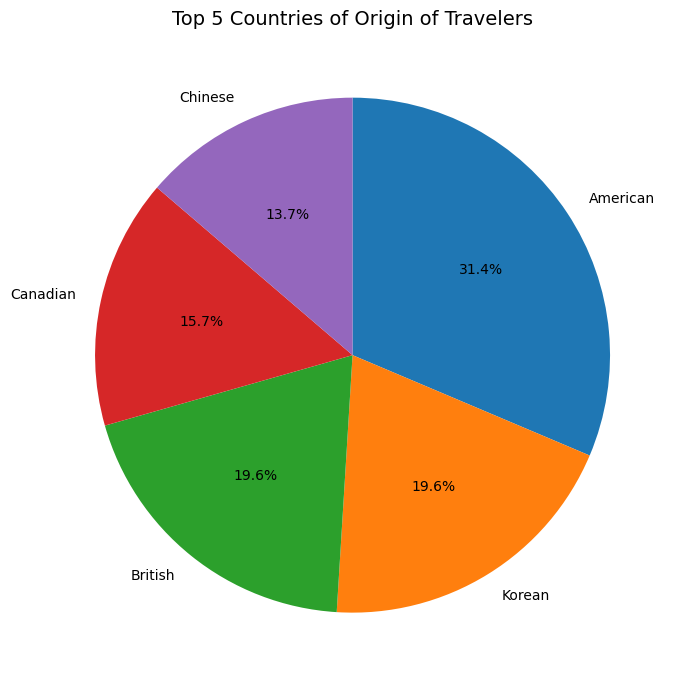

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"travelers_cleaned.csv"
tdf_traveler = pd.read_csv(file_path, encoding="utf-8-sig")
top_nationalities = (
    tdf_traveler["Traveler nationality"]
    .value_counts()
    .head(5)
)
plt.figure(figsize=(7, 7))
plt.pie(
    top_nationalities.values,
    labels=top_nationalities.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("Top 5 Countries of Origin of Travelers", fontsize=14)
plt.tight_layout()
plt.show()

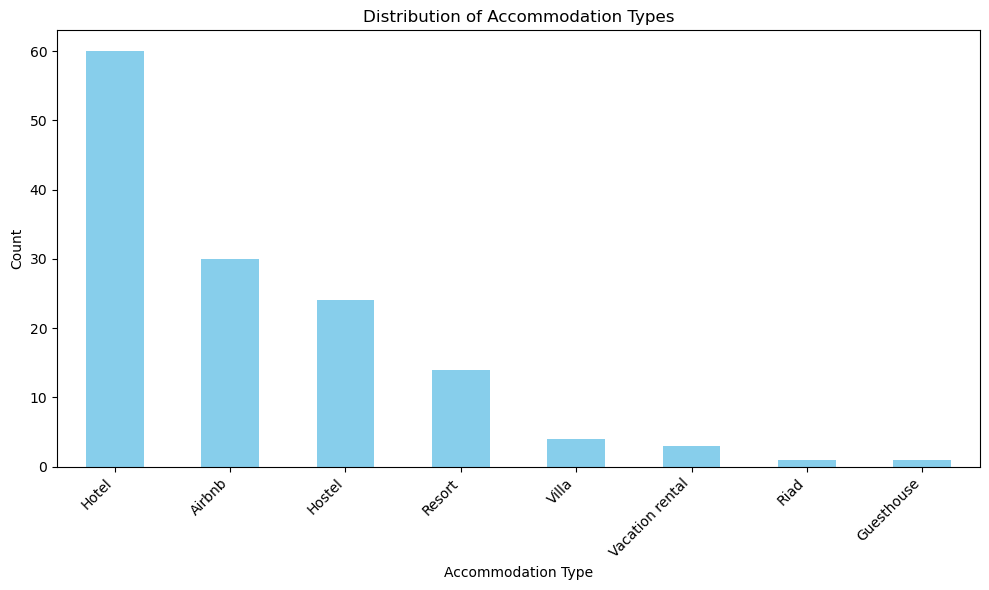

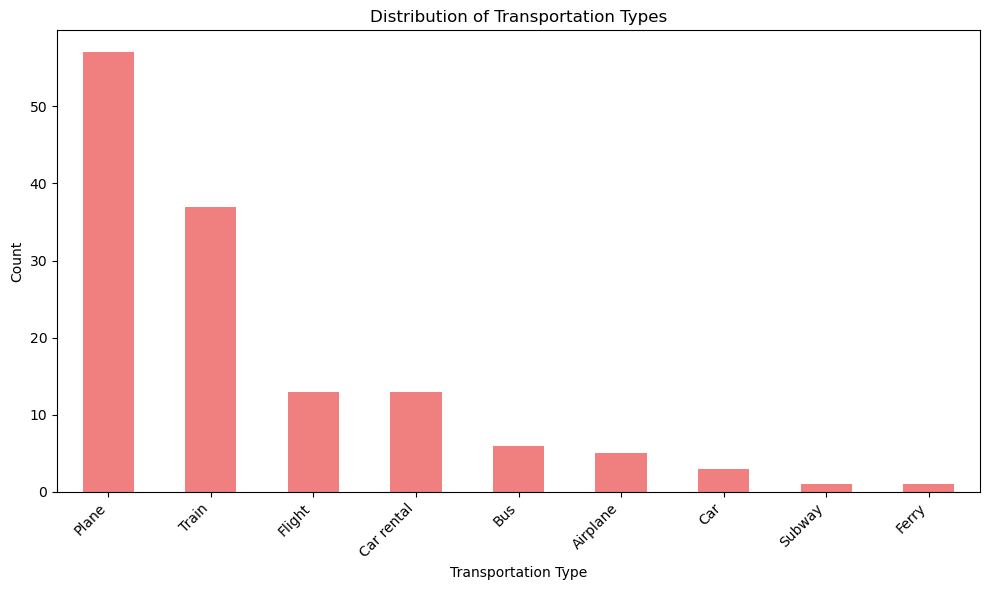

In [273]:
import matplotlib.pyplot as plt
# # Visualize Accommodation Type counts
plt.figure(figsize=(10, 6))
tdf['Accommodation type'].value_counts().plot(kind='bar', color='skyblue') # Changed color to skyblue
plt.title('Distribution of Accommodation Types')
plt.xlabel('Accommodation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Transportation Type counts
plt.figure(figsize=(10, 6))
tdf['Transportation type'].value_counts().plot(kind='bar', color='lightcoral') # Changed color to lightcoral
plt.title('Distribution of Transportation Types')
plt.xlabel('Transportation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



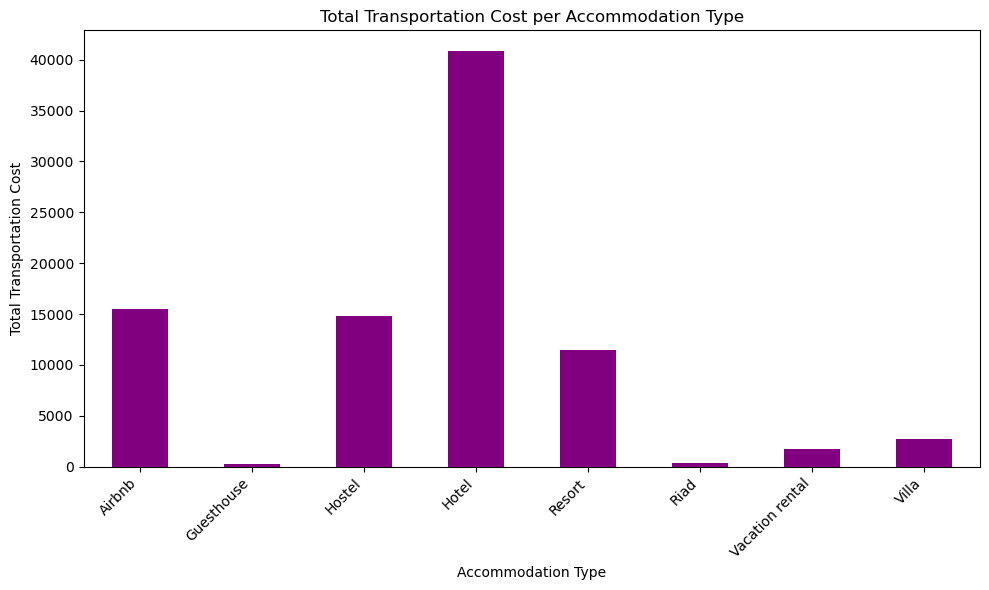

In [276]:
#Visualize the total transportation cost per accommodation type

plt.figure(figsize=(10, 6))
transport_cost_per_accommodation.plot(kind='bar', color='purple')
plt.title('Total Transportation Cost per Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Total Transportation Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()